# Final analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

import os

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# dir path
DATA_DIR = '../data/'
RESULT_DIR = '../results/'

In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
import nltk

## read data

In [7]:
# read dataset using pandas
raw_data = pd.read_csv(os.path.join(DATA_DIR, "Food_Inspections.csv"), parse_dates=True)

In [8]:
raw_data.columns = [column_name.replace(' ', '_').lower() for column_name in raw_data.columns]

In [9]:
raw_data['inspection_date'] = pd.to_datetime(raw_data.inspection_date)

In [10]:
food_fltrd = raw_data[(raw_data.inspection_date>='2022-01-01') & (raw_data.inspection_date<='2022-12-31')]

# Data analysis

In [11]:
food_fltrd

inspection_id                                  dba_name  \
202          2569111                            SUBWAY # 26771   
203          2569114                   STARBUCKS COFFEE #20797   
204          2569116                                MCDONALD'S   
205          2569090                           TACOS VELAZQUEZ   
206          2569079                     KANELA BREAKFAST CLUB   
...              ...                                       ...   
51009        2549992                                  TEN CAFE   
51013        2547077                   COMPASS GROUP USA, INC.   
51015        2546675                              KIMURA SUSHI   
51016        2546215  TAQUERIA EL ARCO #3 EL POLLO FELIZ, INC.   
51019        2547118                     GODDESS AND THE BAKER   

                      aka_name  license_# facility_type             risk  \
202                     SUBWAY  2458696.0    Restaurant    Risk 1 (High)   
203                  STARBUCKS  2341106.0    Restaurant  Risk 2 (Medium)   
204                 MCDONALD'S  1332913.0    Restaurant  Risk 2 (Medium)   
205            TACOS VELAZQUEZ  2886589.0           NaN    Risk 1 (High)   
206      KANELA BREAKFAST CLUB  2882663.0    Restaurant    Risk 1 (High)   
...                        ...        ...           ...              ...   
51009                 TEN CAFE  2713537.0    Restaurant    Risk 1 (High)   
51013  COMPASS GROUP USA, INC.  2830631.0    Restaurant  Risk 2 (Medium)   
51015             KIMURA SUSHI  2569626.0    Restaurant    Risk 1 (High)   
51016    EL POLLO CRIS CRIS #3  1964458.0    Restaurant    Risk 1 (High)   
51019    GODDESS AND THE BAKER  2380099.0    Restaurant    Risk 1 (High)   

                       address     city state      zip inspection_date  \
202         35 W VAN BUREN ST   CHICAGO    IL  60605.0      2022-12-29   
203        3640 N WESTERN AVE   CHICAGO    IL  60618.0      2022-12-30   
204         2609 S KEDZIE AVE   CHICAGO    IL  60623.0      2022-12-30   
205         1729 N CICERO AVE   CHICAGO    IL  60639.0      2022-12-29   
206           1549 N WELLS ST   CHICAGO    IL  60610.0      2022-12-29   
...                        ...      ...   ...      ...             ...   
51009      3308 N WESTERN AVE   CHICAGO    IL  60618.0      2022-02-17   
51013         233 S WACKER DR   CHICAGO    IL  60606.0      2022-01-28   
51015        1422 W Taylor ST   CHICAGO    IL  60607.0      2022-01-19   
51016  7023-7025 S PULASKI RD   CHICAGO    IL  60629.0      2022-01-06   
51019         33 S WABASH AVE   CHICAGO    IL  60603.0      2022-01-28   

             inspection_type             results  \
202    Canvass Re-Inspection                Pass   
203                  Canvass                Pass   
204                  Canvass                Pass   
205                  License                Fail   
206                  License                Pass   
...                      ...                 ...   
51009                Canvass  Pass w/ Conditions   
51013                License           Not Ready   
51015                Canvass  Pass w/ Conditions   
51016              Complaint                Fail   
51019              Complaint  Pass w/ Conditions   

                                              violations   latitude  \
202                                                  NaN  41.876795   
203    57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947   
204    49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...  41.844202   
205                                                  NaN  41.912331   
206                                                  NaN  41.910572   
...                                                  ...        ...   
51009  37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...  41.941586   
51013                                                NaN  41.878560   
51015  1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...  41.869434   
51016  3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.765126   
51019 

In [12]:
food_fltrd.groupby(['address']).agg({'aka_name':[list, 'nunique']}).reset_index()

address  \
                               
0              1 E 113TH ST    
1               1 E 83RD ST    
2               1 E ERIE ST    
3          1 E JACKSON BLVD    
4            1 E PEARSON ST    
...                      ...   
8939     9920 S WESTERN AVE    
8940  9928 S CRANDON AVE FL    
8941    9938 S TORRENCE AVE    
8942   9940 S VINCENNES AVE    
8943     9956 S WESTERN AVE    

                                               aka_name          
                                                   list nunique  
0            [GRAHAM CRACKER'S DAYCARE CENTER II, INC.]       1  
1      [SUBWAY, SUBWAY, SUBWAY, SUBWAY, SUBWAY, SUBWAY]       1  
2                [BRIGHTWOK KITCHEN, BRIGHTWOK KITCHEN]       1  
3     [BARNS AND NOBLE CAFE, Chartwells @ DePaul Uni...       2  
4                [LOYOLA UNIVERSITY, LOYOLA UNIVERSITY]       1  
...                                                 ...     ...  
8939                             [AIN'T SHE SWEET CAFE]       1  
8940                  [BURNHAM MATH AND SCIENCEACADEMY]       1  
8941         [BIG BABY'S SOUTHERN SOUL KITCHEN & GRILL]       1  
8942                   [TAQUERIA MI LINDO DURANGO, INC]       1  
8943                                [FOX'S BEVERLY PUB]       1  

[8944 rows x 3 columns]

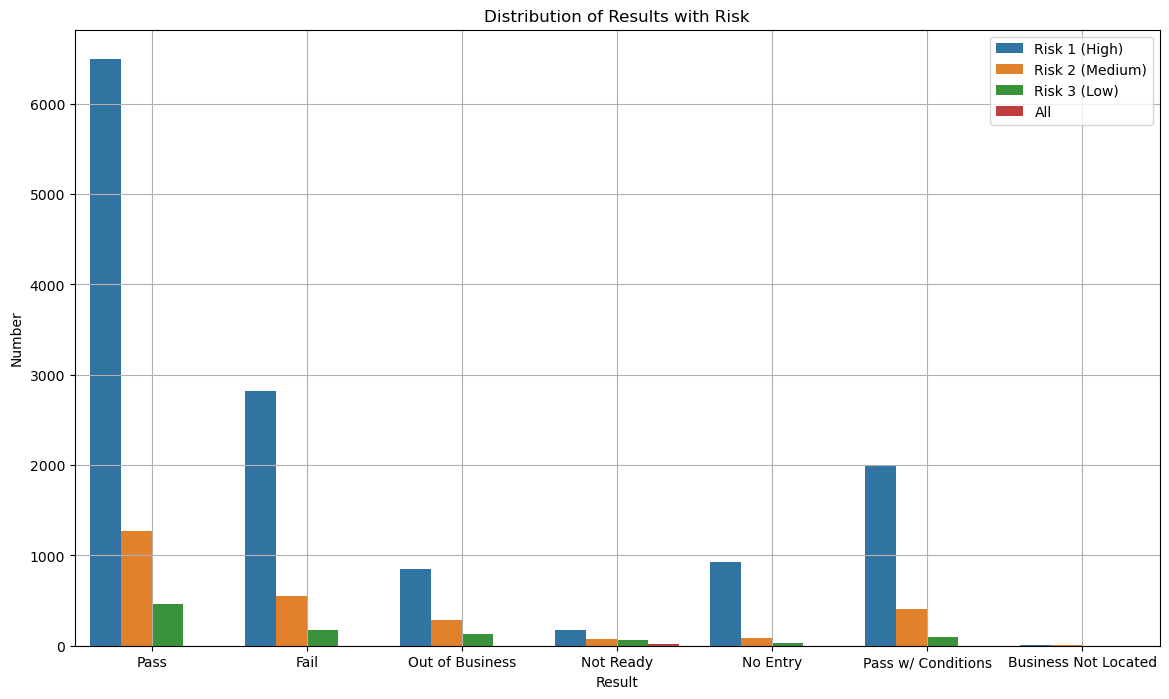

In [13]:
plt.figure(figsize = (14, 8))
ax = sns.countplot(x = 'results', data = food_fltrd, hue="risk")
# ax.bar_label(ax.containers[0])
ax.set(xlabel ="Result", ylabel = "Number", title ='Distribution of Results with Risk')
ax.legend(loc = "upper right")
plt.grid()

In [14]:
food_fltrd.risk.value_counts()

Risk 1 (High)      13265
Risk 2 (Medium)     2682
Risk 3 (Low)         965
All                   15
Name: risk, dtype: int64

In [15]:
agg_df = food_fltrd.groupby(['aka_name', 'inspection_date']).agg({'risk':['count',list]}).reset_index()

In [16]:
agg_df.columns

MultiIndex([(       'aka_name',      ''),
            ('inspection_date',      ''),
            (           'risk', 'count'),
            (           'risk',  'list')],
           )

In [17]:
agg_df.columns = agg_df.columns.map('_'.join)

In [18]:
agg_df

aka_name_ inspection_date_  risk_count  \
0           #1 CHOP SUEY       2022-01-26           1   
1           #1 CHOP SUEY       2022-02-10           1   
2           #1 CHOP SUEY       2022-02-18           1   
3           #1 CHOP SUEY       2022-03-01           1   
4           #1 CHOP SUEY       2022-08-18           1   
...                  ...              ...         ...   
15939          de NOBILI       2022-11-25           1   
15940         iO Theater       2022-07-06           3   
15941         iO Theater       2022-10-06           3   
15942  ï¿½ BAR AND GRILL       2022-11-01           1   
15943  ï¿½ BAR AND GRILL       2022-11-15           1   

                                           risk_list  
0                                    [Risk 1 (High)]  
1                                    [Risk 1 (High)]  
2                                    [Risk 1 (High)]  
3                                    [Risk 1 (High)]  
4                                    [Risk 1 (High)]  
...                                              ...  
15939                                [Risk 1 (High)]  
15940  [Risk 2 (Medium), Risk 3 (Low), Risk 3 (Low)]  
15941  [Risk 2 (Medium), Risk 3 (Low), Risk 3 (Low)]  
15942                                [Risk 1 (High)]  
15943                                [Risk 1 (High)]  

[15944 rows x 4 columns]

In [19]:
agg_df.groupby(["risk_count"]).agg({'aka_name_':'nunique'}).reset_index()

risk_count  aka_name_
0           0          3
1           1       8688
2           2        424
3           3         78
4           4         12
5           5          7
6           7          1
7           8          1
8          12          1

In [20]:
# latest_inspct = food_fltrd.loc[food_fltrd.groupby(['aka_name','license_#']).inspection_date.idxmax()]
latest_inspct = food_fltrd.copy()

In [21]:
lin_plt_df = latest_inspct.groupby('inspection_date').size().reset_index()

<AxesSubplot:xlabel='inspection_date', ylabel='0'>

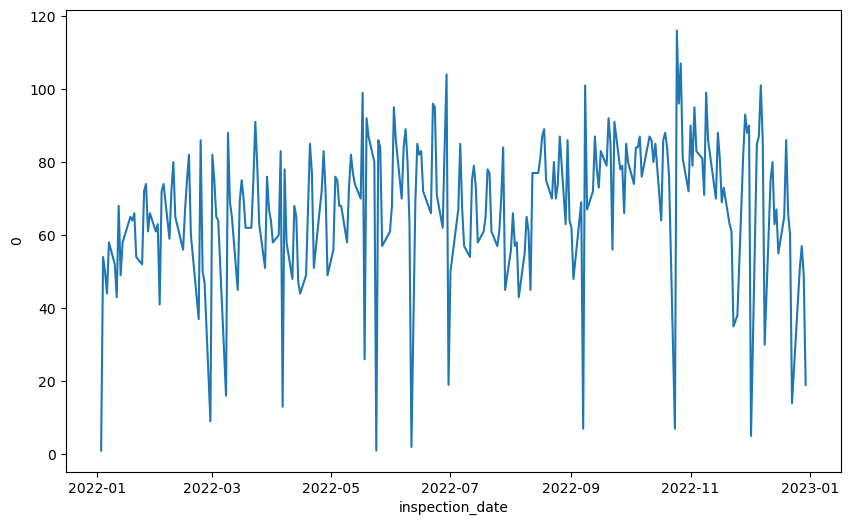

In [22]:
plt.figure(figsize=(10, 6))
date_array  = lin_plt_df['inspection_date']
freq_array = lin_plt_df[0]
sns.lineplot(x = date_array, y = freq_array)

In [23]:
latest_inspct.results.unique()

array(['Pass', 'Fail', 'Out of Business', 'Not Ready', 'No Entry',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

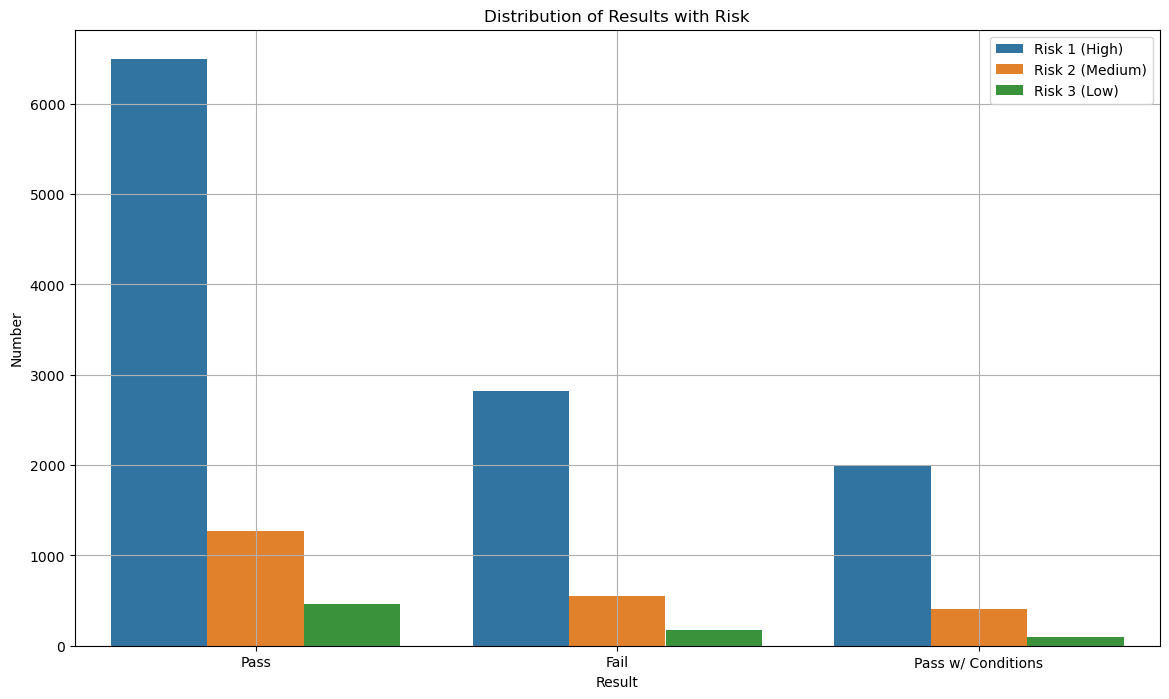

In [24]:
plt.figure(figsize = (14, 8))
ax = sns.countplot(x = 'results', data = latest_inspct[latest_inspct.results.isin(['Pass', 'Fail', 'Pass w/ Conditions'])], hue="risk")
# ax.bar_label(ax.containers[0])
ax.set(xlabel ="Result", ylabel = "Number", title ='Distribution of Results with Risk')
ax.legend(loc = "upper right")
plt.grid()

In [25]:
latest_inspct[(latest_inspct.results=='Pass') & (latest_inspct.risk=='Risk 1 (High)')].groupby(['inspection_type']).size()

inspection_type
Canvass                                   2988
Canvass Re-Inspection                     1502
Complaint                                  442
Complaint Re-Inspection                    454
License                                    653
License Re-Inspection                      263
Non-Inspection                               2
Recent Inspection                           12
Short Form Complaint                       165
Special Events (Festivals)                   1
Suspected Food Poisoning                     7
Suspected Food Poisoning Re-inspection       6
dtype: int64

In [26]:
latest_inspct.head()

inspection_id                 dba_name               aka_name  license_#  \
202        2569111           SUBWAY # 26771                 SUBWAY  2458696.0   
203        2569114  STARBUCKS COFFEE #20797              STARBUCKS  2341106.0   
204        2569116               MCDONALD'S             MCDONALD'S  1332913.0   
205        2569090          TACOS VELAZQUEZ        TACOS VELAZQUEZ  2886589.0   
206        2569079    KANELA BREAKFAST CLUB  KANELA BREAKFAST CLUB  2882663.0   

    facility_type             risk              address     city state  \
202    Restaurant    Risk 1 (High)   35 W VAN BUREN ST   CHICAGO    IL   
203    Restaurant  Risk 2 (Medium)  3640 N WESTERN AVE   CHICAGO    IL   
204    Restaurant  Risk 2 (Medium)   2609 S KEDZIE AVE   CHICAGO    IL   
205           NaN    Risk 1 (High)   1729 N CICERO AVE   CHICAGO    IL   
206    Restaurant    Risk 1 (High)     1549 N WELLS ST   CHICAGO    IL   

         zip inspection_date        inspection_type results  \
202  60605.0      2022-12-29  Canvass Re-Inspection    Pass   
203  60618.0      2022-12-30                Canvass    Pass   
204  60623.0      2022-12-30                Canvass    Pass   
205  60639.0      2022-12-29                License    Fail   
206  60610.0      2022-12-29                License    Pass   

                                            violations   latitude  longitude  \
202                                                NaN  41.876795 -87.628999   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   
204  49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...  41.844202 -87.704887   
205                                                NaN  41.912331 -87.745792   
206                                                NaN  41.910572 -87.634545   

                                     location  
202   (41.87679468592167, -87.62899906139144)  
203   (41.94794732437379, -87.68844043392538)  
204    (41.84420224098303, -87.7048869943916)  
205   (41.91233128070664, -87.74579209447246)  
206  (41.910572111162736, -87.63454539156992)

In [27]:
latest_inspct.facility_type.value_counts()

Restaurant                         11812
Grocery Store                       1670
School                              1158
Children's Services Facility         537
Daycare Above and Under 2 Years      256
                                   ...  
SENIOR DAY CARE                        1
Assisted Living Senior Care            1
MOVIE THEATRE                          1
CATERING/BANQUET                       1
DAYCARE 2 YRS TO 12 YRS                1
Name: facility_type, Length: 132, dtype: int64

In [28]:
latest_inspct.violations.value_counts()

58. ALLERGEN TRAINING AS REQUIRED - Comments: OBSERVED THE CITY OF CHICAGO FOOD CERTIFIED MANAGER WITH NO PROOF OF ALLERGEN TRAINING CERTIFICATE. INSTRUCTED ALL CITY OF CHICAGO CERTIFIED FOOD MANAGERS OBTAIN THIS CERTIFICATE.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [29]:
latest_inspct['violation_code'] = latest_inspct.violations.str.slice(start=0, stop=3).astype(float)

In [30]:
violation_5 = [10.0, 47.0, 55.0, 49.0, 37.0]

In [31]:
latest_inspct.violation_code

202       NaN
203      57.0
204      49.0
205       NaN
206       NaN
         ... 
51009    37.0
51013     NaN
51015     1.0
51016     3.0
51019    64.0
Name: violation_code, Length: 16933, dtype: float64

In [32]:
latest_inspct[latest_inspct.violation_code.isin([37.0])]['violations'].value_counts()

37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER - Comments: OBSERVED PACKAGED FOOD ITEMS IN GRAB AND GO DISPLAY COOLER NOT PROPERLY LABELED WITH INGREDIENTS, NET WEIGHT, ALLERGENS, BUSINESS NAME AND ADDRESS. INSTRUCTED MANAGER TO PROPERLY LABEL ALL PACKAGED FOODS IN GRAB AND GO DISPLAY COOLER AND MAINTAIN.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [33]:
latest_inspct['violation_reason'] = latest_inspct['violations'].str.split('Comments:').str[0]
latest_inspct['violation_comment'] = latest_inspct['violations'].str.split('Comments:').str[1]

In [34]:
list(latest_inspct[latest_inspct.results=='Fail']['violations'][:1])

[nan]

In [35]:
violation_reasn_10 = list(latest_inspct.violation_reason.value_counts()[:10].index)

<AxesSubplot:xlabel='count', ylabel='violation_reason'>

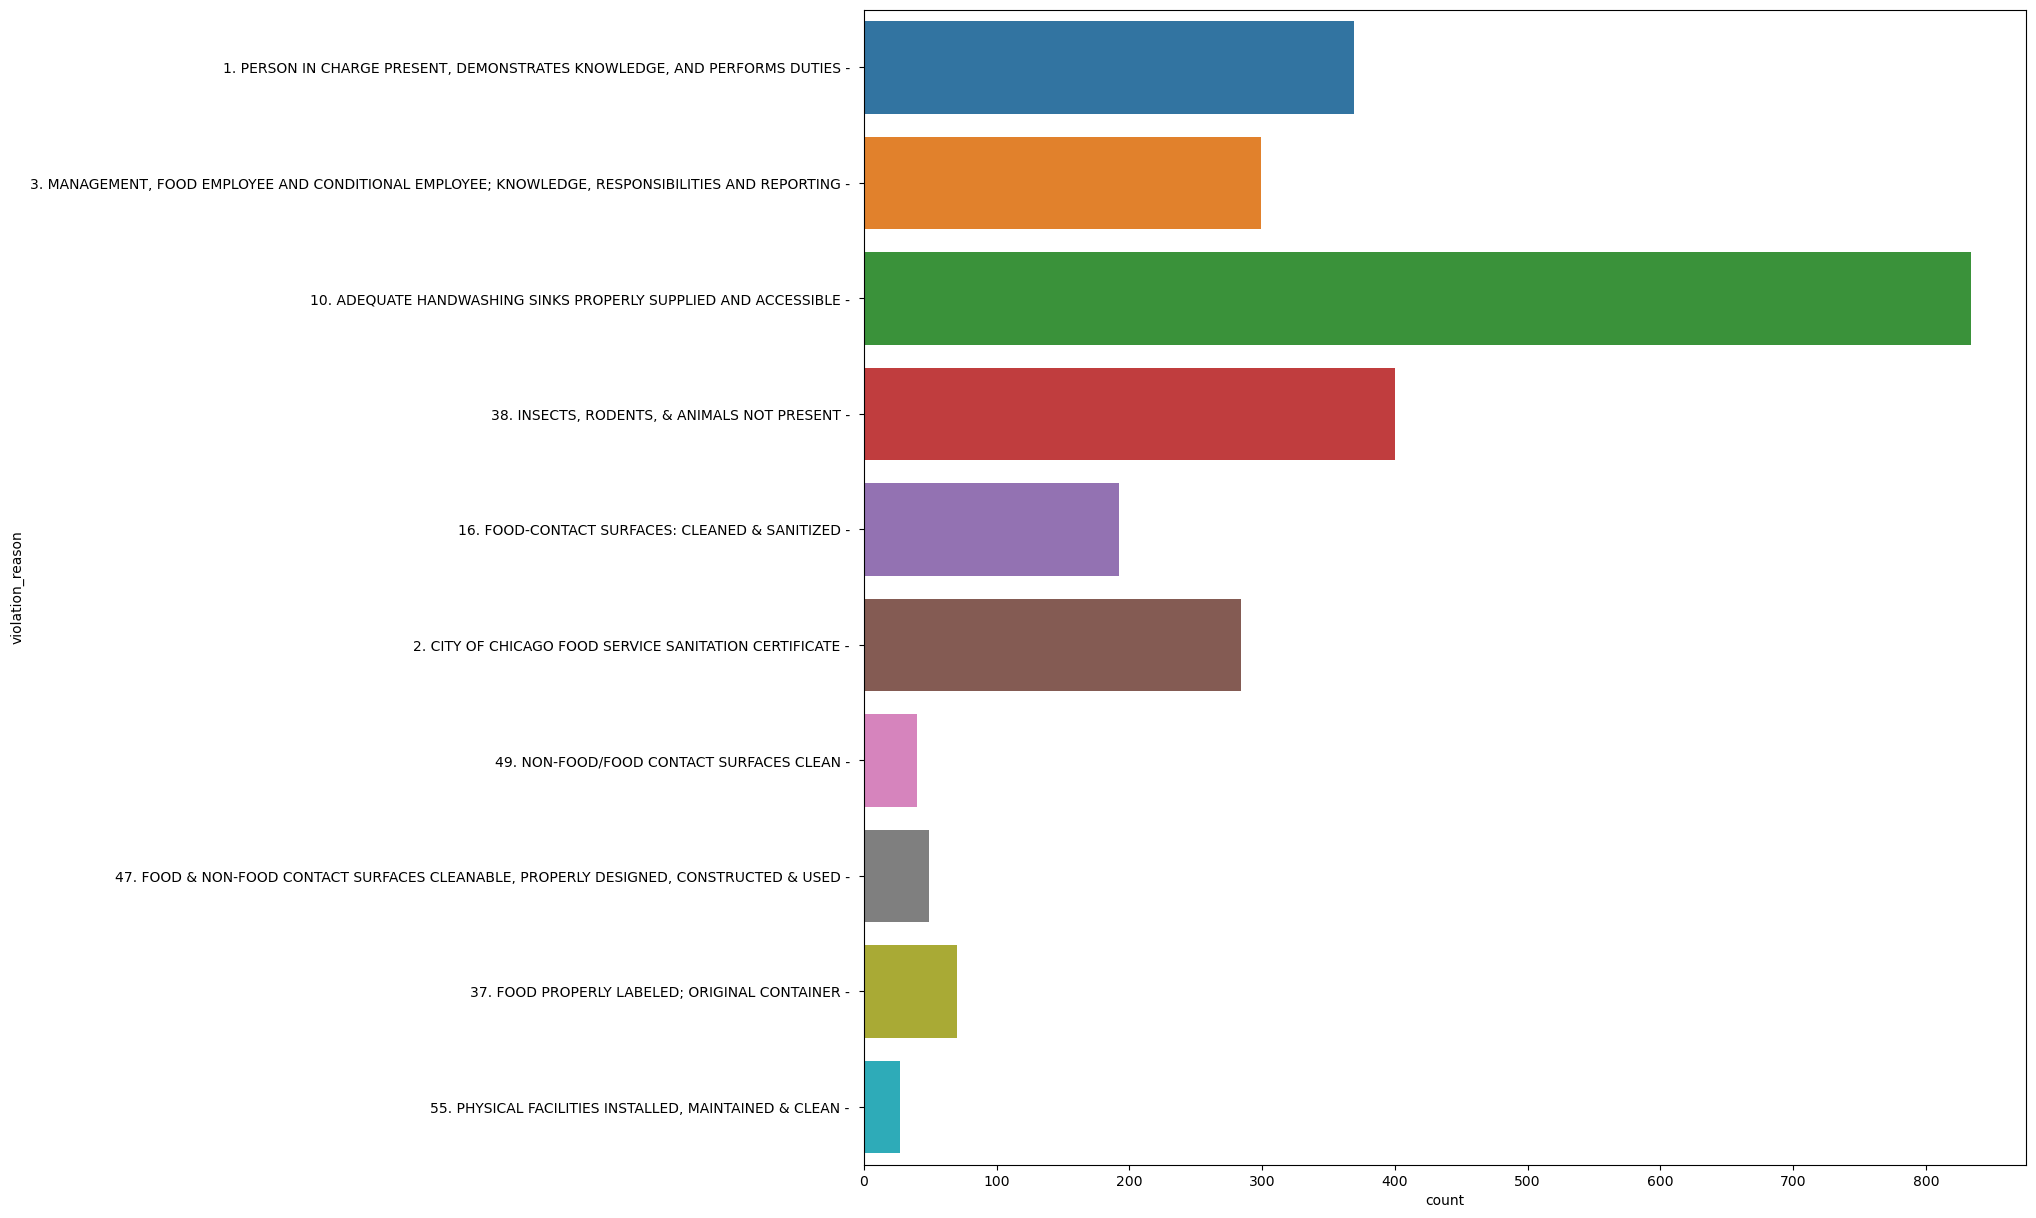

In [36]:
plt.figure(figsize=(15, 15))
sns.countplot(data = latest_inspct[(latest_inspct.results=='Fail')&(latest_inspct.violation_reason.isin(violation_reasn_10))],
              y = 'violation_reason')

<AxesSubplot:xlabel='count', ylabel='violation_reason'>

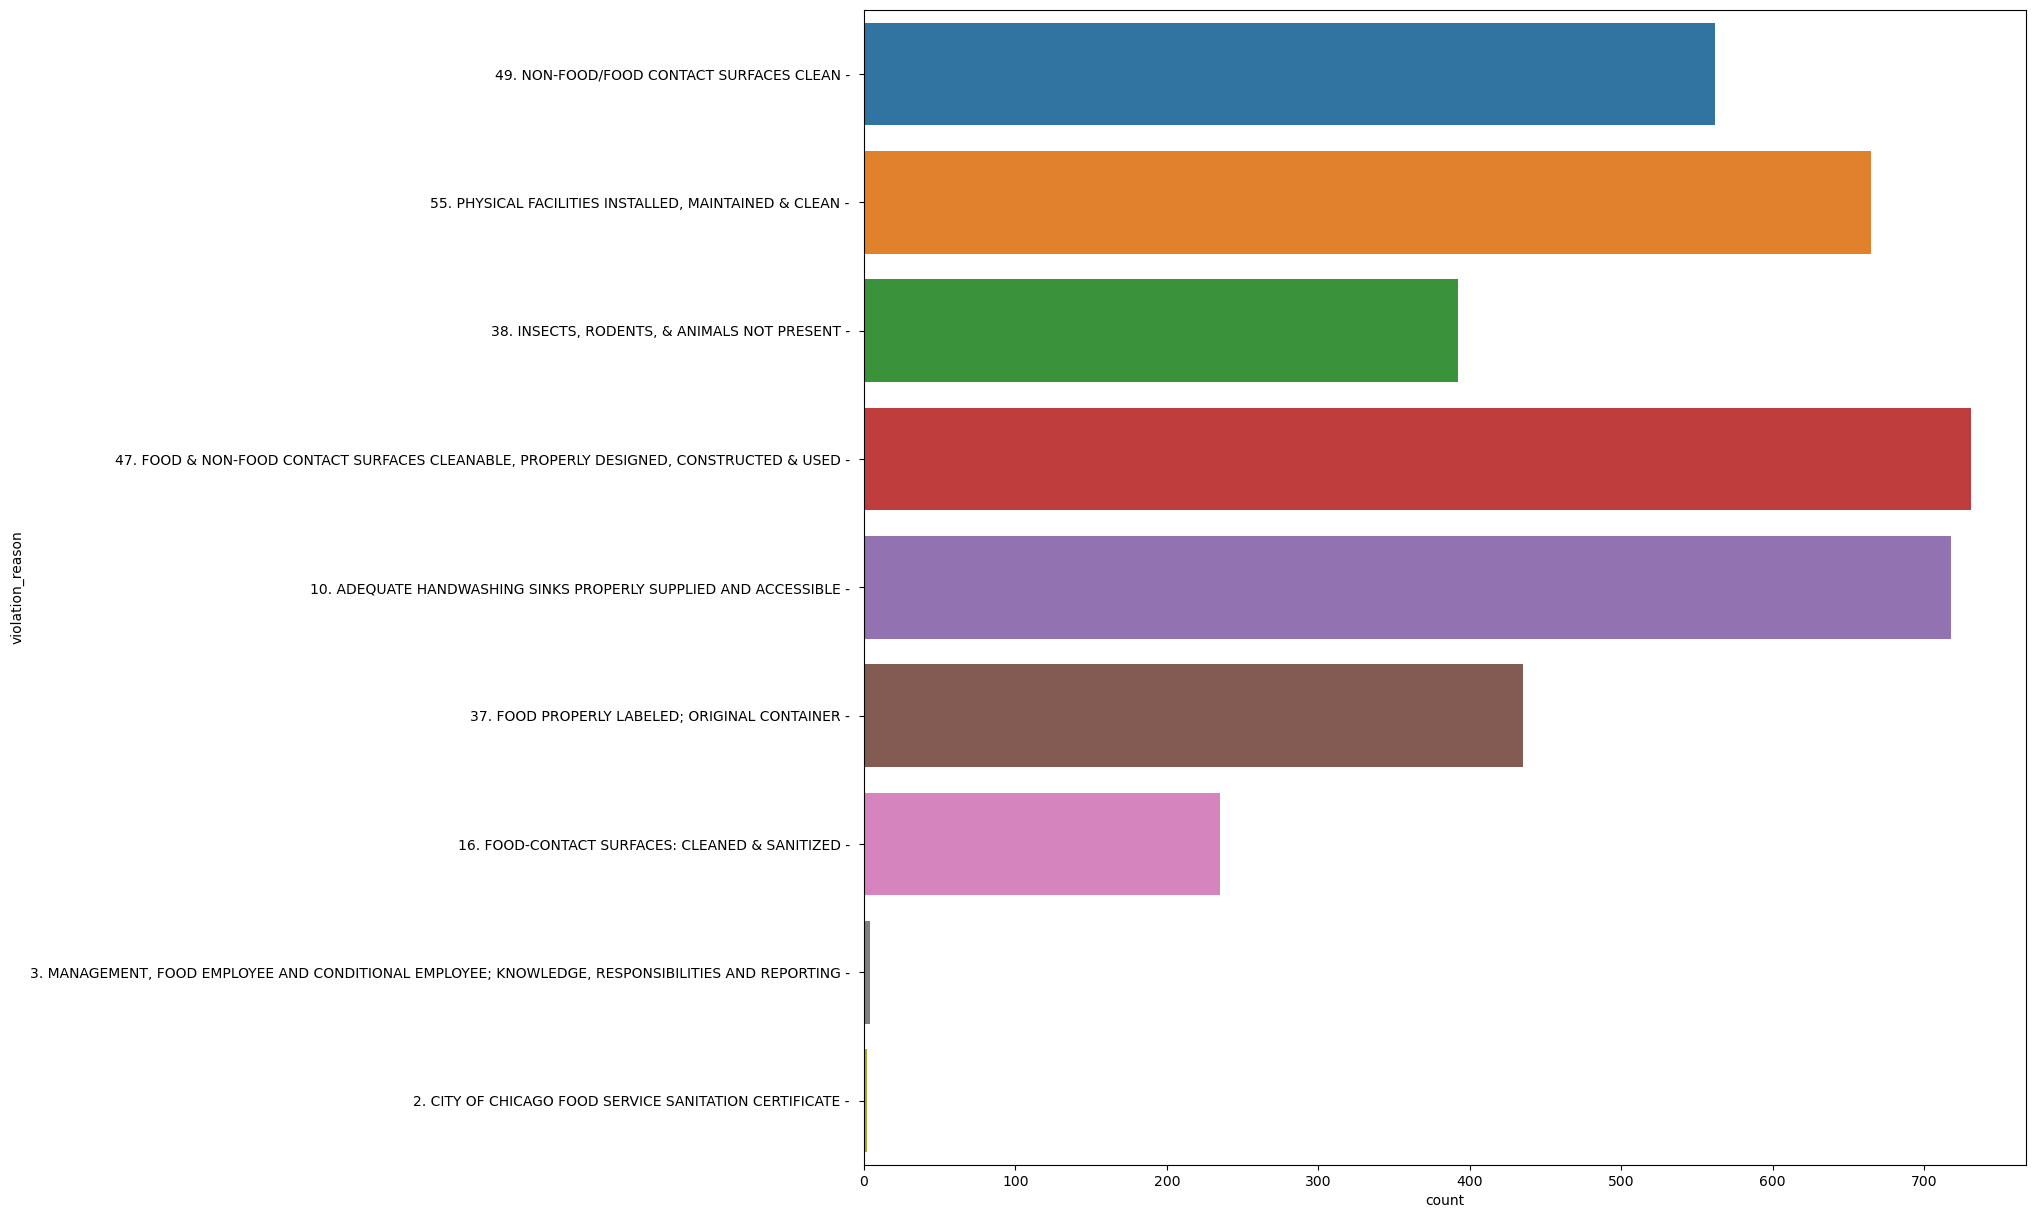

In [37]:
plt.figure(figsize=(15, 15))
sns.countplot(data = latest_inspct[(latest_inspct.results=='Pass')&(latest_inspct.violation_reason.isin(violation_reasn_10))],
              y = 'violation_reason')

In [38]:
text_df = latest_inspct.dropna(subset=['violation_comment'], inplace=False, axis=0)

In [39]:
most_freq_words = pd.Series(" ".join(text_df['violation_comment']).split()).value_counts()

<AxesSubplot:title={'center':'Top 20 Frequent Number Of Words'}>

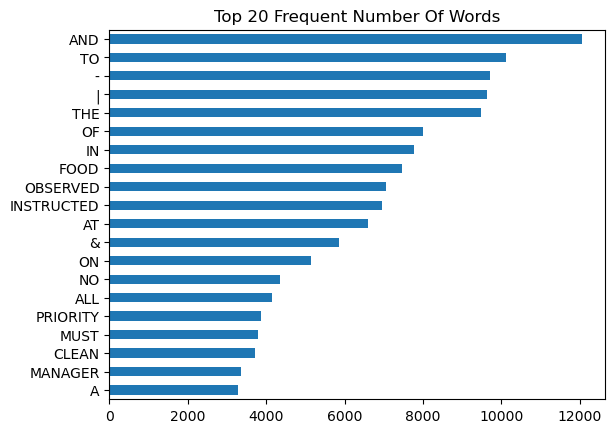

In [40]:
most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Number Of Words")

# Text Cleaning

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

In [42]:
# To lower case text
text_df['violation_comment'] = text_df.violation_comment.str.lower()

In [43]:
# remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/kush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [45]:
stop_words = stop_words + ['must', 'provide', 'city', 'chicago', 'manager', 'food',
                           'violation', 'certified', 'certificate', 'citation']

In [46]:
tokenized_doc = text_df['violation_comment'].apply(lambda x: x.split())

In [47]:
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [48]:
text_df['clean_comment'] = tokenized_doc.astype(str).str.replace('\[|\]|\'', '')
text_df['clean_comment'] = text_df.clean_comment.str.replace(",",'')
text_df['clean_comment'] = text_df['clean_comment'].str.replace(r'\d+','')

In [49]:
text_df['clean_comment'] = text_df.clean_comment.str.replace(r'[^\w\s]', '')

In [50]:
def top_n_words(text, n):
    
    most_freq_words = pd.Series(" ".join(text).split()).value_counts()
    return most_freq_words.head(n).sort_values(ascending = True).plot(kind="barh",title = "Top {n} Frequent Number Of Words".format(n = n))

<AxesSubplot:title={'center':'Top 15 Frequent Number Of Words'}>

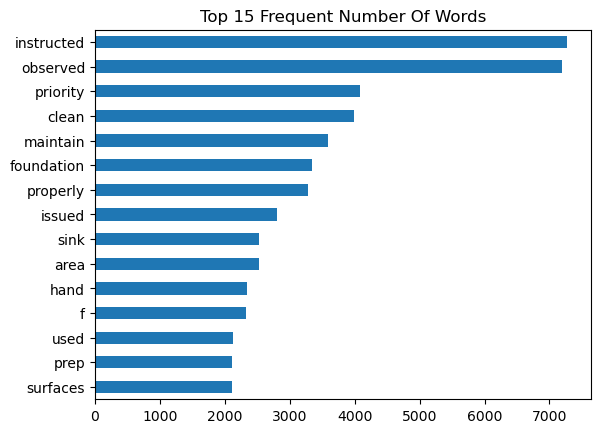

In [51]:
top_n_words(text_df.clean_comment, 15)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')

In [54]:
sparse_matrix = word_vectorizer.fit_transform(text_df[text_df.results=='Fail']['clean_comment'])

In [55]:
frequencies = sum(sparse_matrix).toarray()[0]

In [56]:
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

<AxesSubplot:title={'center':'Top 20 Frequent Bi Grams of Failed Inspections'}, xlabel='Frequency', ylabel='Terms'>

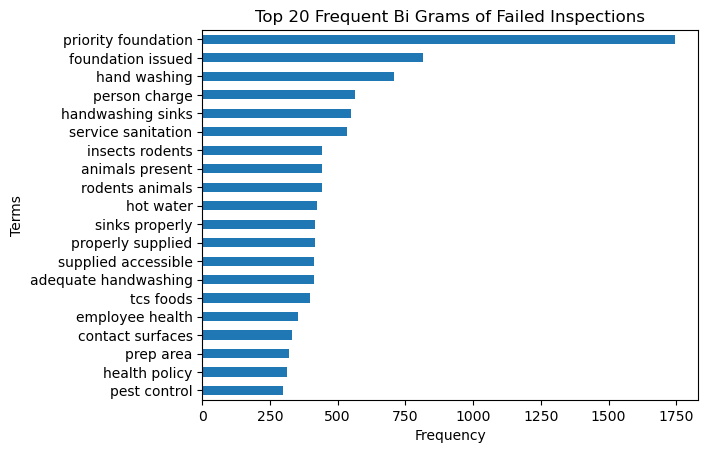

In [57]:
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Bi Grams of Failed Inspections")

## Wordcloud

In [58]:
from wordcloud import WordCloud

In [59]:
text_df.head()

inspection_id                          dba_name  \
203        2569114           STARBUCKS COFFEE #20797   
204        2569116                        MCDONALD'S   
209        2569070                    KEDZIE GROCERY   
210        2569062  YO'S YUMMY'S CATERING/RESTAURANT   
211        2569058                     NORI & WASABI   

                             aka_name  license_#  facility_type  \
203                         STARBUCKS  2341106.0     Restaurant   
204                        MCDONALD'S  1332913.0     Restaurant   
209                    KEDZIE GROCERY  2882190.0  Grocery Store   
210  YO'S YUMMY'S CATERING/RESTAURANT  2876912.0       Catering   
211                     NORI & WASABI  2658824.0     Restaurant   

                risk                   address     city state      zip  \
203  Risk 2 (Medium)       3640 N WESTERN AVE   CHICAGO    IL  60618.0   
204  Risk 2 (Medium)        2609 S KEDZIE AVE   CHICAGO    IL  60623.0   
209     Risk 3 (Low)   4617-4619 N KEDZIE AVE   CHICAGO    IL  60625.0   
210    Risk 1 (High)  4800 W CHICAGO AVE BLDG   CHICAGO    IL  60651.0   
211    Risk 1 (High)        3109 N HALSTED ST   CHICAGO    IL  60657.0   

    inspection_date inspection_type results  \
203      2022-12-30         Canvass    Pass   
204      2022-12-30         Canvass    Pass   
209      2022-12-29         License    Pass   
210      2022-12-28         License    Fail   
211      2022-12-28         Canvass    Pass   

                                            violations   latitude  longitude  \
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   
204  49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...  41.844202 -87.704887   
209  51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...  41.965237 -87.708227   
210  36. THERMOMETERS PROVIDED & ACCURATE - Comment...  41.895112 -87.745932   
211  55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.938182 -87.649070   

                                    location  violation_code  \
203  (41.94794732437379, -87.68844043392538)            57.0   
204   (41.84420224098303, -87.7048869943916)            49.0   
209  (41.96523653337399, -87.70822685098508)            51.0   
210  (41.89511221857764, -87.74593242701515)            36.0   
211  (41.938181501829405, -87.6490696793741)            55.0   

                                      violation_reason  \
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...   
204        49. NON-FOOD/FOOD CONTACT SURFACES CLEAN -    
209  51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...   
210            36. THERMOMETERS PROVIDED & ACCURATE -    
211  55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...   

                                     violation_comment  \
203   food handlers at premises with no food handle...   
204   observed build up on exterior of ice coffee m...   
209   observed no backflow prevention device for ut...   
210   observed no metal stem probe thermometer on t...   
211   noted dirty and dusty ceiling tiles at the re...   

                                         clean_comment  
203     handlers premises handler certificates provide  
204  observed build exterior ice coffee machine sof...  
209  observed backflow prevention device utility si...  
210  observed metal stem probe thermometer premises...  
211  noted dirty dusty ceiling tiles rear prep area...

In [60]:
#Creating the text variable
pass_text = " ".join(cat for cat in text_df[(text_df.results=='Pass')].clean_comment)
fail_text = " ".join(cat for cat in text_df[(text_df.results=='Fail')].clean_comment)

In [67]:
# Creating word_cloud with text as argument in .generate() method
pass_word_cloud = WordCloud(collocations = False, collocation_threshold=3, background_color="white", width=800, height=400).generate(pass_text)

fail_word_cloud = WordCloud(collocations = False, collocation_threshold=3,  background_color="white", width=800, height=400).generate(fail_text)

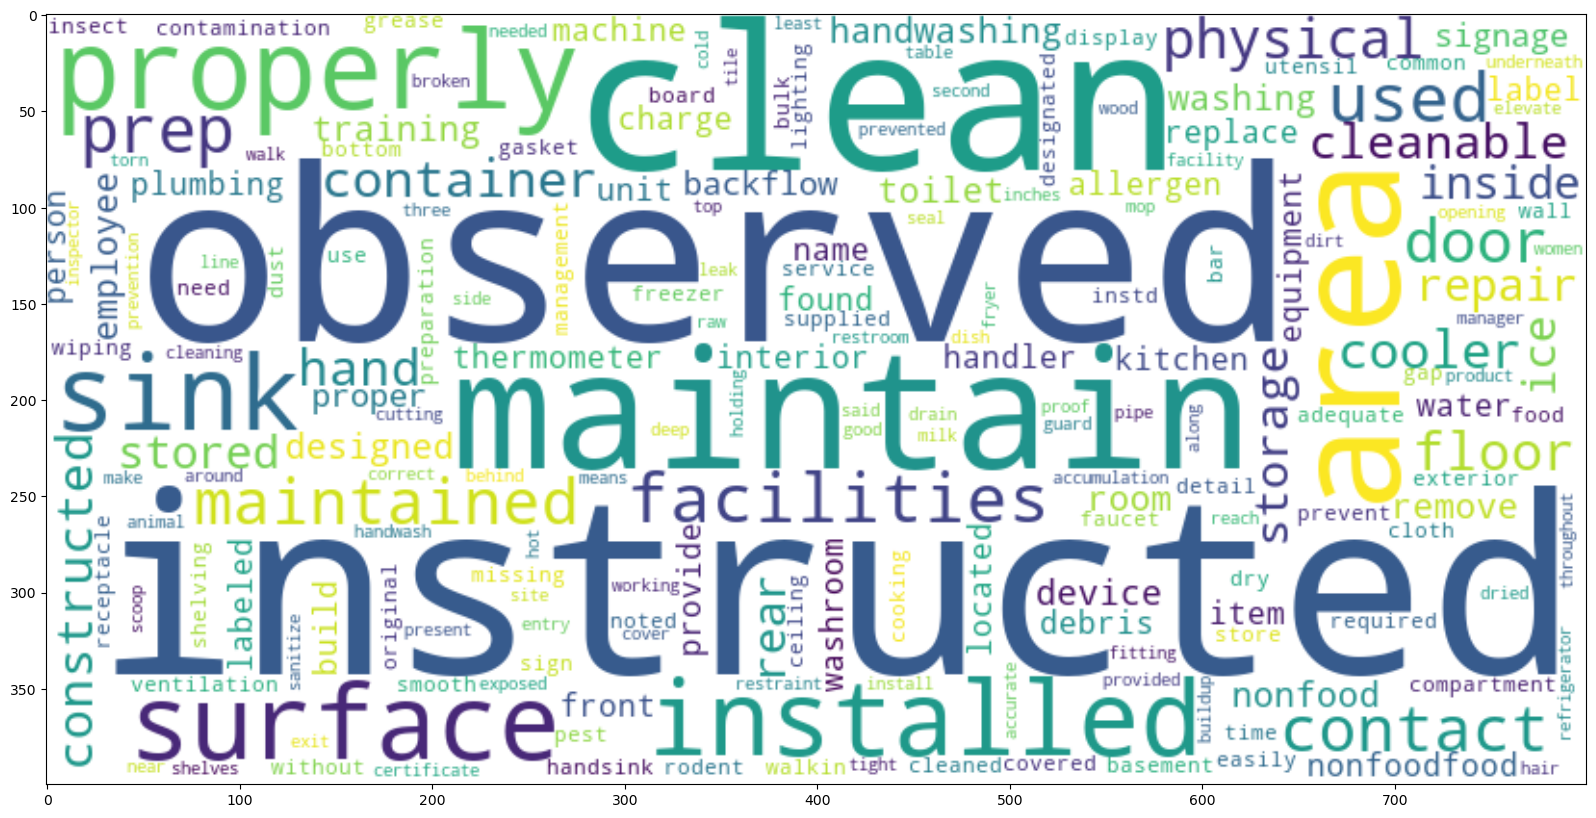

In [71]:
# Display the generated Word Cloud
plt.figure( figsize=(20,10) )
plt.imshow(pass_word_cloud, interpolation='bilinear', )
plt.axis("off")
plt.show()

(-0.5, 799.5, 399.5, -0.5)

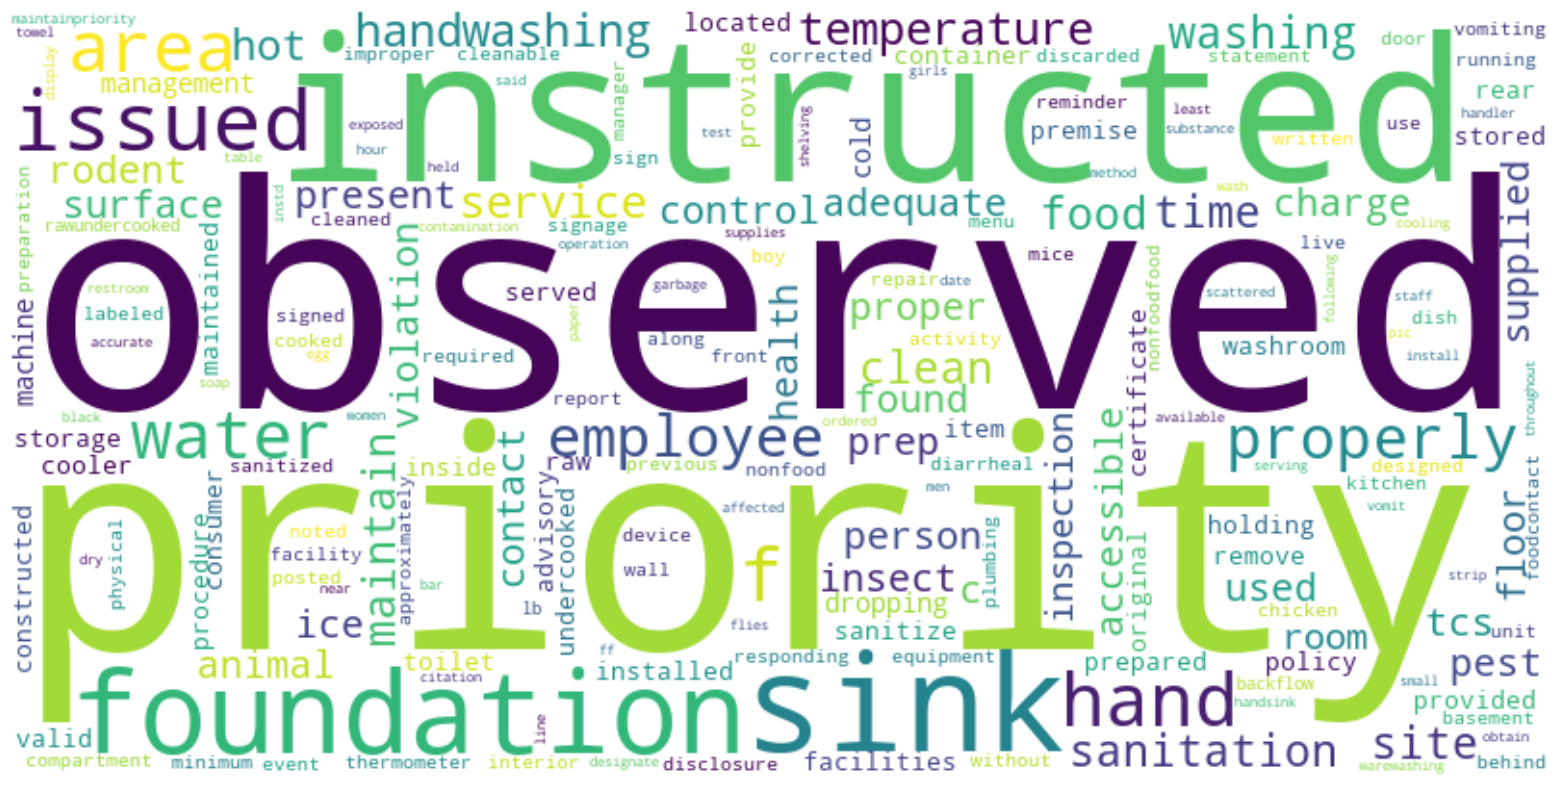

In [72]:
plt.figure( figsize=(20,10) )
plt.imshow(fail_word_cloud, interpolation='bilinear')
plt.axis("off")

In [73]:
#Using count vectoriser to view the frequency of bigrams
bag_of_words = word_vectorizer.fit_transform(text_df[text_df.results=='Fail'].clean_comment)

In [74]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in word_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

[('priority foundation', 1744), ('foundation issued', 816), ('hand washing', 707), ('person charge', 564), ('handwashing sinks', 548), ('service sanitation', 535), ('insects rodents', 443), ('rodents animals', 442), ('animals present', 442), ('hot water', 425), ('sinks properly', 415), ('properly supplied', 415), ('adequate handwashing', 414), ('supplied accessible', 414), ('tcs foods', 396), ('employee health', 354), ('contact surfaces', 332), ('prep area', 322), ('health policy', 314), ('pest control', 299), ('foundation violation', 274), ('washing sinks', 265), ('priority issued', 256), ('water temperature', 255), ('issued adequate', 252), ('violation issued', 248), ('washing sink', 247), ('consumer advisory', 232), ('handwashing sink', 224), ('times priority', 210), ('time inspection', 209), ('ice machine', 207), ('observed hand', 205), ('prepared served', 202), ('diarrheal events', 201), ('facilities installed', 201), ('installed maintained', 201), ('cold holding', 197), ('managem

In [77]:
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, collocation_threshold=3, background_color="white")

(-0.5, 1499.5, 999.5, -0.5)

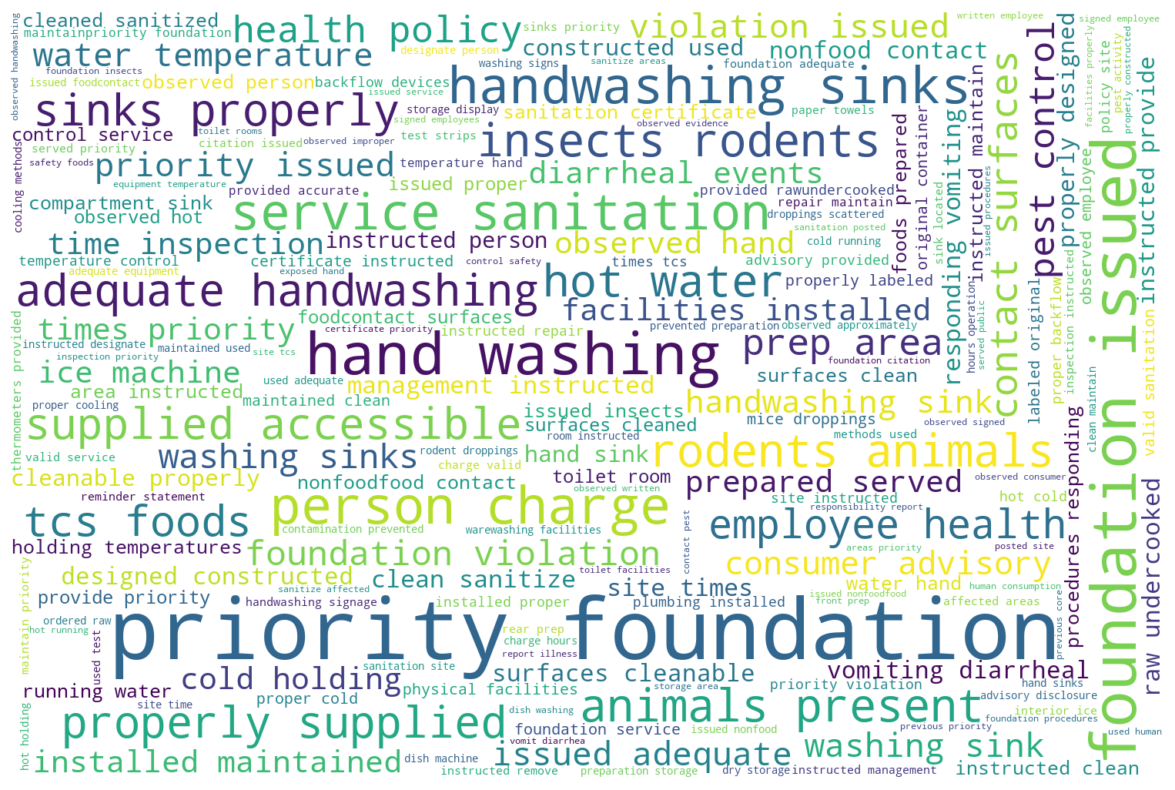

In [78]:
plt.figure(figsize=(20, 10))
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

In [79]:
#Using count vectoriser to view the frequency of bigrams
bag_of_words = word_vectorizer.fit_transform(text_df[text_df.results=='Pass'].clean_comment)

In [80]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in word_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

[('contact surfaces', 1054), ('facilities installed', 989), ('installed maintained', 989), ('physical facilities', 965), ('maintained clean', 965), ('clean maintain', 677), ('prep area', 588), ('nonfood contact', 586), ('properly designed', 565), ('designed constructed', 565), ('surfaces cleanable', 564), ('cleanable properly', 564), ('constructed used', 564), ('hand washing', 532), ('instructed clean', 463), ('surfaces clean', 458), ('nonfoodfood contact', 453), ('area instructed', 435), ('person charge', 400), ('plumbing installed', 393), ('installed proper', 393), ('proper backflow', 393), ('backflow devices', 393), ('allergen training', 389), ('instructed person', 378), ('ice machine', 327), ('maintain physical', 325), ('instructed repair', 310), ('handwashing signage', 310), ('repair maintain', 271), ('compartment sink', 265), ('instructed provide', 247), ('toilet facilities', 235), ('facilities properly', 235), ('properly constructed', 235), ('constructed supplied', 235), ('suppl

In [81]:
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, collocation_threshold=3, background_color="white")

(-0.5, 1499.5, 999.5, -0.5)

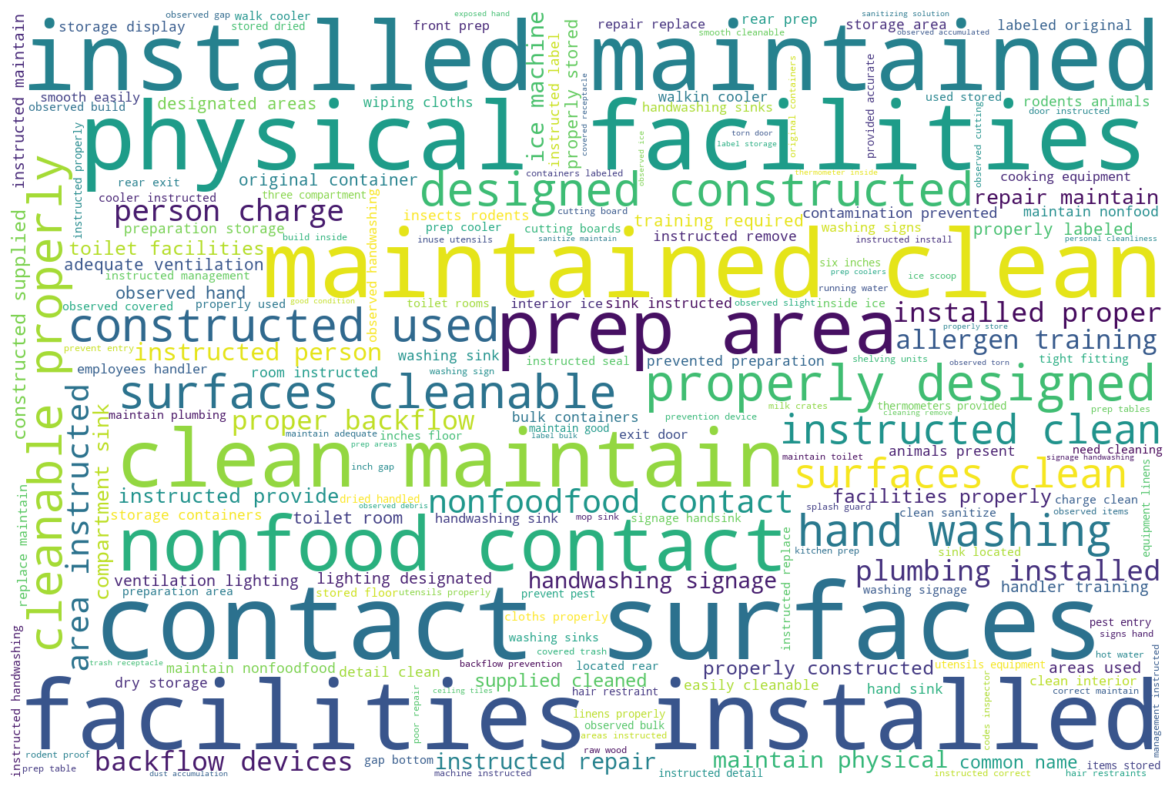

In [82]:
plt.figure(figsize=(20, 10))
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

# Geospatial

In [83]:
latest_inspct = latest_inspct.dropna(subset=['latitude', 'longitude'], axis = 0)

In [84]:
import folium
from folium import plugins

In [85]:
map_attributions = ('&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>')

In [86]:
latest_inspct.head()

inspection_id                 dba_name               aka_name  license_#  \
202        2569111           SUBWAY # 26771                 SUBWAY  2458696.0   
203        2569114  STARBUCKS COFFEE #20797              STARBUCKS  2341106.0   
204        2569116               MCDONALD'S             MCDONALD'S  1332913.0   
205        2569090          TACOS VELAZQUEZ        TACOS VELAZQUEZ  2886589.0   
206        2569079    KANELA BREAKFAST CLUB  KANELA BREAKFAST CLUB  2882663.0   

    facility_type             risk              address     city state  \
202    Restaurant    Risk 1 (High)   35 W VAN BUREN ST   CHICAGO    IL   
203    Restaurant  Risk 2 (Medium)  3640 N WESTERN AVE   CHICAGO    IL   
204    Restaurant  Risk 2 (Medium)   2609 S KEDZIE AVE   CHICAGO    IL   
205           NaN    Risk 1 (High)   1729 N CICERO AVE   CHICAGO    IL   
206    Restaurant    Risk 1 (High)     1549 N WELLS ST   CHICAGO    IL   

         zip inspection_date        inspection_type results  \
202  60605.0      2022-12-29  Canvass Re-Inspection    Pass   
203  60618.0      2022-12-30                Canvass    Pass   
204  60623.0      2022-12-30                Canvass    Pass   
205  60639.0      2022-12-29                License    Fail   
206  60610.0      2022-12-29                License    Pass   

                                            violations   latitude  longitude  \
202                                                NaN  41.876795 -87.628999   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   
204  49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...  41.844202 -87.704887   
205                                                NaN  41.912331 -87.745792   
206                                                NaN  41.910572 -87.634545   

                                     location  violation_code  \
202   (41.87679468592167, -87.62899906139144)             NaN   
203   (41.94794732437379, -87.68844043392538)            57.0   
204    (41.84420224098303, -87.7048869943916)            49.0   
205   (41.91233128070664, -87.74579209447246)             NaN   
206  (41.910572111162736, -87.63454539156992)             NaN   

                                      violation_reason  \
202                                                NaN   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...   
204        49. NON-FOOD/FOOD CONTACT SURFACES CLEAN -    
205                                                NaN   
206                                                NaN   

                                     violation_comment  
202                                                NaN  
203   FOOD HANDLERS AT PREMISES WITH NO FOOD HANDLE...  
204   OBSERVED BUILD UP ON EXTERIOR OF ICE COFFEE M...  
205                                                NaN  
206                                                NaN

In [87]:
latest_inspct.head()

inspection_id                 dba_name               aka_name  license_#  \
202        2569111           SUBWAY # 26771                 SUBWAY  2458696.0   
203        2569114  STARBUCKS COFFEE #20797              STARBUCKS  2341106.0   
204        2569116               MCDONALD'S             MCDONALD'S  1332913.0   
205        2569090          TACOS VELAZQUEZ        TACOS VELAZQUEZ  2886589.0   
206        2569079    KANELA BREAKFAST CLUB  KANELA BREAKFAST CLUB  2882663.0   

    facility_type             risk              address     city state  \
202    Restaurant    Risk 1 (High)   35 W VAN BUREN ST   CHICAGO    IL   
203    Restaurant  Risk 2 (Medium)  3640 N WESTERN AVE   CHICAGO    IL   
204    Restaurant  Risk 2 (Medium)   2609 S KEDZIE AVE   CHICAGO    IL   
205           NaN    Risk 1 (High)   1729 N CICERO AVE   CHICAGO    IL   
206    Restaurant    Risk 1 (High)     1549 N WELLS ST   CHICAGO    IL   

         zip inspection_date        inspection_type results  \
202  60605.0      2022-12-29  Canvass Re-Inspection    Pass   
203  60618.0      2022-12-30                Canvass    Pass   
204  60623.0      2022-12-30                Canvass    Pass   
205  60639.0      2022-12-29                License    Fail   
206  60610.0      2022-12-29                License    Pass   

                                            violations   latitude  longitude  \
202                                                NaN  41.876795 -87.628999   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   
204  49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...  41.844202 -87.704887   
205                                                NaN  41.912331 -87.745792   
206                                                NaN  41.910572 -87.634545   

                                     location  violation_code  \
202   (41.87679468592167, -87.62899906139144)             NaN   
203   (41.94794732437379, -87.68844043392538)            57.0   
204    (41.84420224098303, -87.7048869943916)            49.0   
205   (41.91233128070664, -87.74579209447246)             NaN   
206  (41.910572111162736, -87.63454539156992)             NaN   

                                      violation_reason  \
202                                                NaN   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...   
204        49. NON-FOOD/FOOD CONTACT SURFACES CLEAN -    
205                                                NaN   
206                                                NaN   

                                     violation_comment  
202                                                NaN  
203   FOOD HANDLERS AT PREMISES WITH NO FOOD HANDLE...  
204   OBSERVED BUILD UP ON EXTERIOR OF ICE COFFEE M...  
205                                                NaN  
206                                                NaN

In [88]:
zip_map_df = latest_inspct[latest_inspct.results.isin(['Pass', 'Fail', 'Pass w/ Conditions'])]

In [89]:
zip_count_df = zip_map_df.groupby(['zip', 'results']).size().reset_index().rename({0:'Count'}, axis=1)

In [90]:
zip_count_df.head()

zip             results  Count
0  60601.0                Fail     41
1  60601.0                Pass    115
2  60601.0  Pass w/ Conditions     66
3  60602.0                Fail     26
4  60602.0                Pass     55

In [91]:
boundary_file = os.path.join(DATA_DIR, "Boundaries - ZIP Codes.geojson")
with open(boundary_file, 'r') as f:
    zipcode_boundary = json.load(f)

In [92]:
zip_count_df.zip = zip_count_df.zip.astype(int).astype(str)

In [93]:
basemap = folium.Map(location=[41.85, -87.68],
                         control_scale=True,
                     tiles='Cartodb Positron', 
                     attr = map_attributions,
                         zoom_start=10)

In [94]:
# Create choropleth map  
folium.Choropleth(
    geo_data=zipcode_boundary,
    name='choropleth',
    data=zip_count_df[zip_count_df.results=='Fail'],
    columns=['zip', 'Count'],
    key_on='feature.properties.zip',
    fill_color='OrRd',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='Inspection Failed count'
).add_to(basemap)

In [95]:
# for lat,lon,name,tip in zip(latest_inspct['latitude'], latest_inspct['longitude'], latest_inspct['dba_name'], latest_inspct['zip']):
#     folium.Marker(location=[lat,lon], tooltip = tip, popup = name).add_to(basemap)

In [96]:
cnt_df = zip_map_df.groupby(['zip']).agg(meanLat=('latitude', 'mean'),
                                         meanLong=('longitude', 'mean'), 
                                        count_inspect=('latitude', 'count')).reset_index()

In [97]:
cnt_df.zip = cnt_df.zip.astype(int).astype(str)

In [98]:
pivot_df = pd.pivot(data = zip_count_df, index = 'zip', columns=['results'], values=['Count']).reset_index()

In [99]:
pivot_df.columns = pivot_df.columns.map('_'.join)

In [100]:
pivot_df

zip_  Count_Fail  Count_Pass  Count_Pass w/ Conditions
0   60601        41.0       115.0                      66.0
1   60602        26.0        55.0                      24.0
2   60603        23.0        54.0                      43.0
3   60604        26.0        54.0                      17.0
4   60605        83.0       130.0                      33.0
5   60606        80.0       118.0                      58.0
6   60607        92.0       262.0                     141.0
7   60608       122.0       220.0                      37.0
8   60609        80.0       192.0                      36.0
9   60610        58.0       190.0                      64.0
10  60611        51.0       313.0                     106.0
11  60612        45.0       140.0                      43.0
12  60613        67.0       197.0                      52.0
13  60614       115.0       257.0                      89.0
14  60615        25.0        84.0                      12.0
15  60616        70.0       235.0                      25.0
16  60617        70.0       147.0                      29.0
17  60618       129.0       265.0                      87.0
18  60619       125.0       137.0                      34.0
19  60620       151.0       135.0                      55.0
20  60621        44.0        52.0                      10.0
21  60622       101.0       269.0                      78.0
22  60623        65.0       189.0                      51.0
23  60624        22.0        94.0                      12.0
24  60625        52.0       222.0                      76.0
25  60626        73.0       128.0                      32.0
26  60628       125.0       117.0                      46.0
27  60629       124.0       149.0                      46.0
28  60630        35.0       117.0                      33.0
29  60631        17.0        69.0                      14.0
30  60632       135.0       177.0                      62.0
31  60633         7.0        16.0                       4.0
32  60634        44.0       162.0                      50.0
33  60636        62.0        85.0                      28.0
34  60637        20.0        96.0                      19.0
35  60638        52.0       169.0                      43.0
36  60639       139.0       206.0                     103.0
37  60640        73.0       264.0                      43.0
38  60641        37.0       152.0                      28.0
39  60642        35.0       110.0                      41.0
40  60643        46.0       116.0                      27.0
41  60644        22.0       107.0                       8.0
42  60645        40.0        59.0                      15.0
43  60646        17.0        76.0                      16.0
44  60647       158.0       260.0                     126.0
45  60649        25.0       123.0                      20.0
46  60651        25.0       100.0                      10.0
47  60652        46.0        81.0                      14.0
48  60653        29.0        75.0                      15.0
49  60654        72.0       208.0                      80.0
50  60655        14.0        30.0                       7.0
51  60656         3.0        26.0                       7.0
52  60657        71.0       200.0                     131.0
53  60659        33.0       185.0                      30.0
54  60660        96.0       132.0                      37.0
55  60661        48.0        99.0                      46.0
56  60666        11.0       103.0                      17.0
57  60706         NaN         NaN                       1.0
58  60707        29.0        44.0                      11.0
59  60827         8.0         7.0                       2.0

In [101]:
viz_df = pivot_df.merge(cnt_df, how = 'left', left_on='zip_', right_on='zip')

In [102]:
viz_df

zip_  Count_Fail  Count_Pass  Count_Pass w/ Conditions    zip    meanLat  \
0   60601        41.0       115.0                      66.0  60601  41.885955   
1   60602        26.0        55.0                      24.0  60602  41.882735   
2   60603        23.0        54.0                      43.0  60603  41.880655   
3   60604        26.0        54.0                      17.0  60604  41.878214   
4   60605        83.0       130.0                      33.0  60605  41.870547   
5   60606        80.0       118.0                      58.0  60606  41.881543   
6   60607        92.0       262.0                     141.0  60607  41.878483   
7   60608       122.0       220.0                      37.0  60608  41.852276   
8   60609        80.0       192.0                      36.0  60609  41.811350   
9   60610        58.0       190.0                      64.0  60610  41.903453   
10  60611        51.0       313.0                     106.0  60611  41.894322   
11  60612        45.0       140.0                      43.0  60612  41.878842   
12  60613        67.0       197.0                      52.0  60613  41.953362   
13  60614       115.0       257.0                      89.0  60614  41.924287   
14  60615        25.0        84.0                      12.0  60615  41.799821   
15  60616        70.0       235.0                      25.0  60616  41.847382   
16  60617        70.0       147.0                      29.0  60617  41.723747   
17  60618       129.0       265.0                      87.0  60618  41.947759   
18  60619       125.0       137.0                      34.0  60619  41.748979   
19  60620       151.0       135.0                      55.0  60620  41.743530   
20  60621        44.0        52.0                      10.0  60621  41.775693   
21  60622       101.0       269.0                      78.0  60622  41.902410   
22  60623        65.0       189.0                      51.0  60623  41.847676   
23  60624        22.0        94.0                      12.0  60624  41.876313   
24  60625        52.0       222.0                      76.0  60625  41.970067   
25  60626        73.0       128.0                      32.0  60626  42.009340   
26  60628       125.0       117.0                      46.0  60628  41.696390   
27  60629       124.0       149.0                      46.0  60629  41.777982   
28  60630        35.0       117.0                      33.0  60630  41.971016   
29  60631        17.0        69.0                      14.0  60631  41.998195   
30  60632       135.0       177.0                      62.0  60632  41.807438   
31  60633         7.0        16.0                       4.0  60633  41.654164   
32  60634        44.0       162.0                      50.0  60634  41.945864   
33  60636        62.0        85.0                      28.0  60636  41.775072   
34  60637        20.0        96.0                      19.0  60637  41.783453   
35  60638        52.0       169.0                      43.0  60638  41.788748   
36  60639       139.0       206.0                     103.0  60639  41.921263   
37  60640        73.0       264.0                      43.0  60640  41.972019   
38  60641        37.0       152.0                      28.0  60641  41.948500   
39  60642        35.0       110.0                      41.0  60642  41.900157   
40  60643        46.0       116.0                      27.0  60643  41.703081   
41  60644        22.0       107.0                       8.0  60644  41.880629   
42  60645        40.0        59.0                      15.0  60645  42.011478   
43  60646        17.0        76.0                      16.0  60646  41.992850   
44  60647       158.0       260.0                     126.0  60647  41.920134   
45  60649        25.0       123.0                      20.0  60649  41.761664   
46  60651        25.0       100.0                      10.0  60651  41.899288   
47  60652        46.0        81.0                      14.0  60652  41.747019   
48  60653        29.0        75.0   

In [103]:
for lat, lan, zip_cd, inspect_cnt, pass_cnt, fail_cnt, pass_w_cond_cnt in zip(viz_df['meanLat'], viz_df['meanLong'], 
                                                                              viz_df['zip'], 
                                                                      viz_df['count_inspect'], viz_df['Count_Pass'], 
                                                                      viz_df["Count_Fail"], viz_df["Count_Pass w/ Conditions"]):    

    popContent = ("Zip Code: " + str(zip_cd) + '<br>' +\
                  "Total Inspection: " + str(inspect_cnt) + '<br>'+\
                  "Pass: " + str(pass_cnt) + '<br>' +\
                  "Inspections Failed: " + str(fail_cnt) + '<br>' +\
                  "Pass w/ Condition: " + str(pass_w_cond_cnt))
    iframe = folium.IFrame(popContent)
    popup1 = folium.Popup(iframe,
                         min_width=200,
                         max_width=200, )   
    
    folium.Marker(location=[lat,lan],popup = popup1).add_to(basemap)

In [104]:
basemap

In [105]:
basemap.save(os.path.join(RESULT_DIR, 'InspectionDetails_2022.html'))

# Neighbourhood boundaries

In [106]:
import geopandas as gpd
from shapely.geometry import Point

In [108]:
neighbourhd_gpd = gpd.read_file(os.path.join(DATA_DIR, 'Boundaries - Neighborhoods.geojson'), driver='GeoJSON')

In [109]:
neighbourhd_gpd

pri_neigh               sec_neigh     shape_area     shape_len  \
0      Grand Boulevard             BRONZEVILLE  48492503.1554  28196.837157   
1         Printers Row            PRINTERS ROW  2162137.97139   6864.247156   
2        United Center           UNITED CENTER  32520512.7053  23101.363745   
3   Sheffield & DePaul      SHEFFIELD & DEPAUL  10482592.2987  13227.049745   
4        Humboldt Park           HUMBOLDT PARK  125010425.593  46126.751351   
..                 ...                     ...            ...           ...   
93      Belmont Cragin  BELMONT CRAGIN,HERMOSA  109099407.211  43311.706886   
94              Austin                  AUSTIN  170037750.826  55473.345911   
95          Gold Coast              GOLD COAST  7165705.53467  13685.479377   
96            Boystown                BOYSTOWN  3365778.97115   9780.268985   
97         River North             RIVER NORTH  38766442.5194   31506.03781   

                                             geometry  
0   MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...  
1   MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ...  
2   MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...  
3   MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ...  
4   MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ...  
..                                                ...  
93  MULTIPOLYGON (((-87.74143 41.91698, -87.74141 ...  
94  MULTIPOLYGON (((-87.75620 41.91547, -87.75588 ...  
95  MULTIPOLYGON (((-87.62646 41.91147, -87.62640 ...  
96  MULTIPOLYGON (((-87.64878 41.93999, -87.64927 ...  
97  MULTIPOLYGON (((-87.63145 41.90390, -87.63144 ...  

[98 rows x 5 columns]

In [110]:
neighbourhd_gpd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

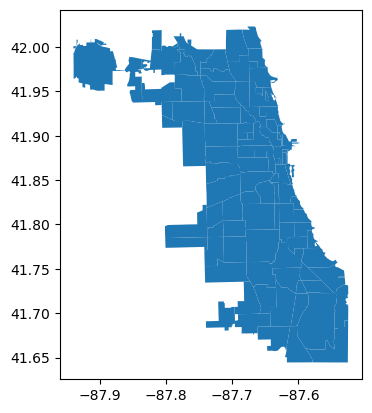

In [111]:
neighbourhd_gpd.plot()

In [112]:
geometry = [Point(xy) for xy in zip(latest_inspct.longitude, latest_inspct.latitude)]

In [113]:
latest_gdf = gpd.GeoDataFrame(latest_inspct, crs="EPSG:4326", geometry=geometry)

In [114]:
inspect_wd_neighbrhd = gpd.sjoin(latest_gdf, neighbourhd_gpd, how = 'left')

In [115]:
latest_inspct.shape

(16863, 21)

## Plotting neighbourhoods

In [116]:
inspect_wd_neighbrhd = inspect_wd_neighbrhd

In [117]:
neigh_count_df = inspect_wd_neighbrhd.groupby(['pri_neigh', 'results']).size().reset_index().rename({0:'Count'}, axis=1)

In [118]:
neigh_count_df

pri_neigh             results  Count
0     Albany Park                Fail     55
1     Albany Park            No Entry     18
2     Albany Park           Not Ready      2
3     Albany Park     Out of Business     23
4     Albany Park                Pass    129
..            ...                 ...    ...
543  Wrigleyville            No Entry     16
544  Wrigleyville           Not Ready      6
545  Wrigleyville     Out of Business     10
546  Wrigleyville                Pass     74
547  Wrigleyville  Pass w/ Conditions     19

[548 rows x 3 columns]

In [119]:
neighbourhd_gpd[['pri_neigh', 'geometry']].dtypes

pri_neigh      object
geometry     geometry
dtype: object

In [120]:
neigh_count_df = neigh_count_df.merge(neighbourhd_gpd[['pri_neigh', 'geometry']], how='left', on = 'pri_neigh')

In [121]:
with open(os.path.join(DATA_DIR, 'Boundaries - Neighborhoods.geojson'), 'r') as f:
    neighbourhd_boundary = json.load(f)

In [122]:
cnt_df = inspect_wd_neighbrhd.groupby(['pri_neigh']).agg(meanLat=('latitude', 'mean'),
                                         meanLong=('longitude', 'mean'), 
                                        count_inspect=('latitude', 'count')).reset_index()

In [123]:
pivot_df = pd.pivot(data = neigh_count_df, index = 'pri_neigh', columns=['results'], values=['Count']).reset_index()

In [124]:
pivot_df.columns = pivot_df.columns.map('_'.join)

In [125]:
viz_df = pivot_df.merge(cnt_df, how = 'left', left_on='pri_neigh_', right_on='pri_neigh')

In [126]:
viz_df

pri_neigh_  Count_Business Not Located  Count_Fail  Count_No Entry  \
0      Albany Park                         NaN        55.0            18.0   
1    Andersonville                         NaN        10.0            10.0   
2   Archer Heights                         NaN        31.0             4.0   
3    Armour Square                         NaN         4.0             2.0   
4          Ashburn                         NaN        44.0             2.0   
..             ...                         ...         ...             ...   
93      West Ridge                         NaN        63.0            21.0   
94       West Town                         NaN        46.0            29.0   
95     Wicker Park                         NaN        58.0            21.0   
96        Woodlawn                         NaN         9.0             1.0   
97    Wrigleyville                         NaN        25.0            16.0   

    Count_Not Ready  Count_Out of Business  Count_Pass  \
0               2.0                   23.0       129.0   
1               NaN                    4.0        49.0   
2               4.0                    5.0        36.0   
3               2.0                    5.0        25.0   
4               3.0                   14.0        78.0   
..              ...                    ...         ...   
93              6.0                   31.0       211.0   
94              8.0                   12.0       158.0   
95              5.0                   27.0       131.0   
96              3.0                    7.0        42.0   
97              6.0                   10.0        74.0   

    Count_Pass w/ Conditions       pri_neigh    meanLat   meanLong  \
0                       53.0     Albany Park  41.966852 -87.719554   
1                        7.0   Andersonville  41.979709 -87.668608   
2                       13.0  Archer Heights  41.806869 -87.726830   
3                        5.0   Armour Square  41.837345 -87.633848   
4                       13.0         Ashburn  41.745738 -87.708202   
..                       ...             ...        ...        ...   
93                      37.0      West Ridge  41.999649 -87.692900   
94                      49.0       West Town  41.896250 -87.664101   
95                      52.0     Wicker Park  41.908306 -87.677409   
96                      12.0        Woodlawn  41.779326 -87.602736   
97                      19.0    Wrigleyville  41.949136 -87.658021   

    count_inspect  
0             280  
1              80  
2              93  
3              43  
4             154  
..            ...  
93            369  
94            302  
95            294  
96             74  
97            150  

[98 rows x 12 columns]

In [127]:
viz_df.count_inspect.sum()

16701

In [128]:
viz_df['Failed_pcnt'] = np.round((viz_df['Count_Fail']/viz_df['count_inspect'])*100, 2)

In [129]:
viz_df

pri_neigh_  Count_Business Not Located  Count_Fail  Count_No Entry  \
0      Albany Park                         NaN        55.0            18.0   
1    Andersonville                         NaN        10.0            10.0   
2   Archer Heights                         NaN        31.0             4.0   
3    Armour Square                         NaN         4.0             2.0   
4          Ashburn                         NaN        44.0             2.0   
..             ...                         ...         ...             ...   
93      West Ridge                         NaN        63.0            21.0   
94       West Town                         NaN        46.0            29.0   
95     Wicker Park                         NaN        58.0            21.0   
96        Woodlawn                         NaN         9.0             1.0   
97    Wrigleyville                         NaN        25.0            16.0   

    Count_Not Ready  Count_Out of Business  Count_Pass  \
0               2.0                   23.0       129.0   
1               NaN                    4.0        49.0   
2               4.0                    5.0        36.0   
3               2.0                    5.0        25.0   
4               3.0                   14.0        78.0   
..              ...                    ...         ...   
93              6.0                   31.0       211.0   
94              8.0                   12.0       158.0   
95              5.0                   27.0       131.0   
96              3.0                    7.0        42.0   
97              6.0                   10.0        74.0   

    Count_Pass w/ Conditions       pri_neigh    meanLat   meanLong  \
0                       53.0     Albany Park  41.966852 -87.719554   
1                        7.0   Andersonville  41.979709 -87.668608   
2                       13.0  Archer Heights  41.806869 -87.726830   
3                        5.0   Armour Square  41.837345 -87.633848   
4                       13.0         Ashburn  41.745738 -87.708202   
..                       ...             ...        ...        ...   
93                      37.0      West Ridge  41.999649 -87.692900   
94                      49.0       West Town  41.896250 -87.664101   
95                      52.0     Wicker Park  41.908306 -87.677409   
96                      12.0        Woodlawn  41.779326 -87.602736   
97                      19.0    Wrigleyville  41.949136 -87.658021   

    count_inspect  Failed_pcnt  
0             280        19.64  
1              80        12.50  
2              93        33.33  
3              43         9.30  
4             154        28.57  
..            ...          ...  
93            369        17.07  
94            302        15.23  
95            294        19.73  
96             74        12.16  
97            150        16.67  

[98 rows x 13 columns]

In [130]:
basemap = folium.Map(location=[41.85, -87.68],
                         control_scale=True,
                     tiles='Cartodb Positron', 
                     attr = map_attributions,
                         zoom_start=10)

In [131]:
# Create choropleth map  
folium.Choropleth(
    geo_data=neighbourhd_boundary,
    name='choropleth',
    data=neigh_count_df[neigh_count_df.results=='Fail'],
    columns=['pri_neigh', 'Count'],
    key_on='feature.properties.pri_neigh',
    fill_color='OrRd',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='Inspection Failed count'
).add_to(basemap)

In [132]:
for lat, lan, neigh, inspect_cnt, pass_cnt, fail_cnt, pass_w_cond_cnt, _ in zip(viz_df['meanLat'], viz_df['meanLong'], 
                                                                              viz_df['pri_neigh'], 
                                                                      viz_df['count_inspect'], viz_df['Count_Pass'], 
                                                                      viz_df["Count_Fail"], viz_df["Count_Pass w/ Conditions"], viz_df['Failed_pcnt']):    

    popContent = ("Neighborhood: " + str(neigh) + '<br>' +\
                  "Total Inspection: " + str(inspect_cnt) + '<br>'+\
                  "Pass: " + str(pass_cnt) + '<br>' +\
                  "Failed Percent: " + str(fail_cnt)  +'<br>' +\
                  "Pass w/ Condition: " + str(pass_w_cond_cnt) + '<br>' + \
                  '<br>' + "Fail Percent: " + str(_) + str('%'))
    iframe = folium.IFrame(popContent)
    popup1 = folium.Popup(iframe,
                         min_width=250,
                         max_width=200)   
    
    folium.Marker(location=[lat,lan],popup = popup1, tooltip=neigh, opacity=.15, weight=.01).add_to(basemap)

In [133]:
basemap

In [134]:
viz_df.sort_values(["count_inspect", "Failed_pcnt"], ascending=[False, False])

pri_neigh_  Count_Business Not Located  Count_Fail  Count_No Entry  \
52            Loop                         1.0       226.0            65.0   
91       West Loop                         NaN       121.0            61.0   
73     River North                         NaN       106.0            91.0   
46       Lake View                         NaN        92.0            52.0   
9   Belmont Cragin                         NaN       105.0            16.0   
..             ...                         ...         ...             ...   
74       Riverdale                         NaN         8.0             NaN   
56  Millenium Park                         NaN         2.0             1.0   
36      Grant Park                         NaN         NaN             1.0   
15        Burnside                         NaN         2.0             NaN   
68         Oakland                         NaN         NaN             NaN   

    Count_Not Ready  Count_Out of Business  Count_Pass  \
52             20.0                   93.0       441.0   
91             12.0                   80.0       310.0   
73             17.0                   71.0       317.0   
46              6.0                   42.0       259.0   
9               8.0                   35.0       166.0   
..              ...                    ...         ...   
74              NaN                    1.0         7.0   
56              2.0                    1.0         7.0   
36              NaN                    NaN         3.0   
15              NaN                    NaN         1.0   
68              NaN                    NaN         2.0   

    Count_Pass w/ Conditions       pri_neigh    meanLat   meanLong  \
52                     219.0            Loop  41.880905 -87.629080   
91                     151.0       West Loop  41.881898 -87.647793   
73                     120.0     River North  41.894034 -87.633934   
46                     142.0       Lake View  41.941758 -87.654550   
9                       77.0  Belmont Cragin  41.928051 -87.764578   
..                       ...             ...        ...        ...   
74                       2.0       Riverdale  41.654966 -87.602471   
56                       NaN  Millenium Park  41.882930 -87.623729   
36                       NaN      Grant Park  41.878916 -87.621147   
15                       NaN        Burnside  41.728535 -87.596293   
68                       NaN         Oakland  41.822532 -87.603752   

    count_inspect  Failed_pcnt  
52           1065        21.22  
91            735        16.46  
73            722        14.68  
46            593        15.51  
9             407        25.80  
..            ...          ...  
74             18        44.44  
56             13        15.38  
36              4          NaN  
15              3        66.67  
68              2          NaN  

[98 rows x 13 columns]

In [135]:
basemap.save(os.path.join(RESULT_DIR, "InspectionByNeighbourhoodDetails_2022.html"))

# Analysis by neighbourhood

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


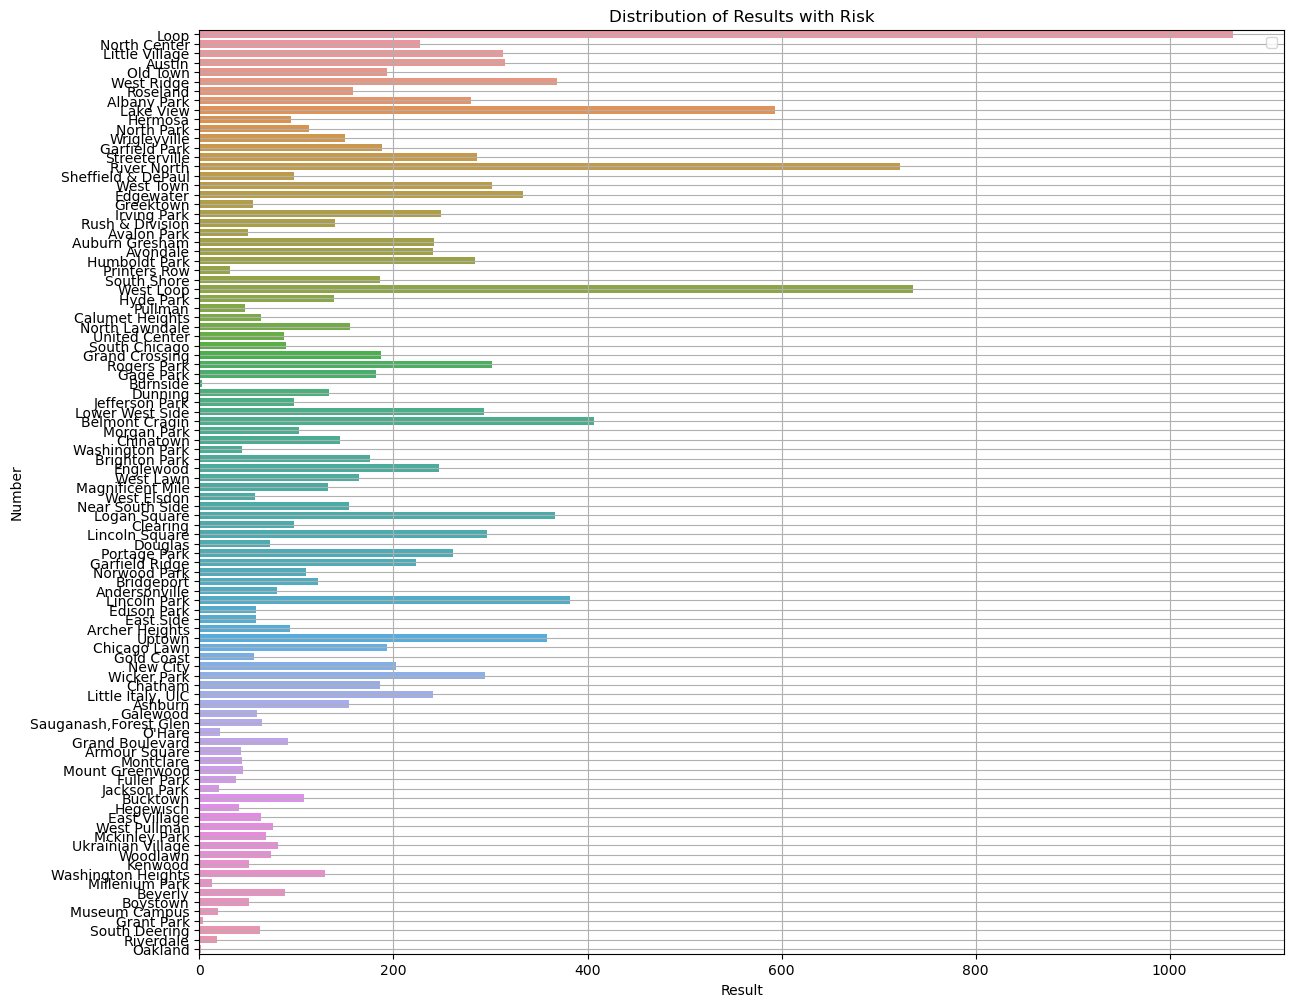

In [136]:
plt.figure(figsize = (14, 12))
ax = sns.countplot(y = 'pri_neigh', data = inspect_wd_neighbrhd)
# ax.bar_label(ax.containers[0])
ax.set(xlabel ="Result", ylabel = "Number", title ='Distribution of Results with Risk')
ax.legend(loc = "upper right")
plt.grid()

In [137]:
inspect_wd_neighbrhd.to_csv(os.path.join(RESULT_DIR, 'FoodInspectionWdNeighbourhood_20220308.csv'))